# Imports and Setups

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import plotnine as p9
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline
import transformer
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from fairnesTester import FairnessTester
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split
from fairnesTester import FairnessTester

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier

#pipelines and transformer

cat_trans = Pipeline(steps=[
    ("selector", transformer.DataSelector("object")),
    ("one_hot", preprocessing.OneHotEncoder())
])
num_trans = Pipeline(steps=[
    ("selector", transformer.DataSelector("number")),
    ("scaler", StandardScaler() )
])

pre_pipe = FeatureUnion(transformer_list=[
    ("cat", cat_trans),
    ("num", num_trans)
])

lb = LabelBinarizer()
del_nan = transformer.DeleteNAN("")

# Importing and preparing the data


## Adult Income Data set

In [ ]:
filename = "Datasets/adult.data"
names = ["age", "workclass", "fnlwgt","education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "class"]
train = pd.read_csv(filename, names=names)
test = test = pd.read_csv("Datasets/adult.test", names=names)

del_nan.set_nan_char(" ?")
train = del_nan.transform(train)
test = del_nan.transform(test)

train["class"] = lb.fit_transform(train["class"])
test["class"] = lb.fit_transform(test["class"])

train_data = pre_pipe.fit_transform(train.drop("class", axis=1))
train_labels = train["class"]

test_data = pre_pipe.transform(test.drop("class", axis=1))
test_labels = test["class"]

#attribute for Fairness tester
dataset_name = "Adult_Income"
priv_val = " Male"
unpriv_val = " Female"
protected_att = "sex"

## German Credit Dataset

In [ ]:
filename = "Datasets/german.data"
names = ["status existing account","duration", "credit history", "purpose", "credit amount", "savings", "employment since", "installment rate", "sex", "other debtors", "residence since", "property", "age", "installment plans", "housing", "num existing credits", "job", "no of pople liable", "telephone", "foreign worker", "class" ]
data = pd.read_csv(filename, sep=" ", names =names)

data["class"] = lb.fit_transform(data["class"])

data, test, train_labels, test_labels = train_test_split(data, data["class"], random_state=42)

train_data = pre_pipe.fit_transform(data.drop("class", axis=1))
test_data = pre_pipe.transform(test.drop("class", axis=1))

#transform for Fairness tester
test["sex"].replace(["A91","A93", "A94"],"m",inplace=True)
test["sex"].replace(["A92","A95"],"f",inplace=True)

#attribute for Fairness tester
dataset_name = "German_Credit"
priv_val = "m"
unpriv_val = "f"
protected_att = "sex"


## Default of Credit Card Payments

In [ ]:
filename = "Datasets/default of credit.xls"
data_inp = pd.read_excel(filename, dtype={"X1": int,"X2": object,"X3": object,"X4": object,"X5": object,"X6": object,"X7": object,"X8": object,"X9": object,"X10": object,"X11": object,"X12": int,"X13": int,"X14": int,"X15": int,"X16": int,"X17": int,"X23": int,"X18": int,"X19": int,"X20": int,"X21": int,"X22": int})

data_inp = data_inp.rename(columns={"Y": "class"})

data, test, train_labels, test_labels = train_test_split(data_inp, data_inp["class"], random_state=42)

pre_pipe.fit(data_inp.drop("class", axis=1))
train_data = pre_pipe.transform(data.drop("class", axis=1))
test_data = pre_pipe.transform(test.drop("class", axis=1))


#attribute for Fairness tester
dataset_name = "Default_Of_Credit"
priv_val = 1 #male
unpriv_val = 2 #female
protected_att = "X2"



## Rici vs Stefano Dataset

In [ ]:
filename = "Datasets/ricci.csv"
data_inp = pd.read_csv(filename).drop("Unnamed: 0", axis=1)
#applicants with combine >= 70 pass
#read paper Did the Results of Promotion Exams Have a Disparate Impact on Minorities? Using Statistical Evidence in Ricci v. DeStefano
data_inp.rename(columns={"Combine": "class"}, inplace=True)

data_inp.loc[(data_inp["class"]<70), "class"] = 0
data_inp.loc[data_inp["class"]>=70, "class"] = 1


data, test, train_labels, test_labels = train_test_split(data_inp, data_inp["class"], random_state=42)

pre_pipe.fit(data_inp.drop("class", axis=1))
train_data = pre_pipe.transform(data.drop("class", axis=1))
test_data = pre_pipe.transform(test.drop("class", axis=1))

#transform for Fairness tester
test["Race"].replace(["H","B",],"NW",inplace=True)


#attribute for Fairness tester
dataset_name = "Ricci_vs_Stefano"
priv_val = "W" #white
unpriv_val = "NW" #not white
protected_att = "Race"


## Heart Disease Dataset

In [ ]:
filename = "Datasets/processed.cleveland.data"
names = ["age", "sex", 3,4,5,6,7,8,9,10,11,12,13,"class"]
data_inp = pd.read_csv(filename, names=names)


data_inp.loc[data_inp["class"]>=1, "class"] = 1 #existing heart disase

data, test, train_labels, test_labels = train_test_split(data_inp, data_inp["class"], random_state=42)

pre_pipe.fit(data_inp.drop("class", axis=1))
train_data = pre_pipe.transform(data.drop("class", axis=1))
test_data = pre_pipe.transform(test.drop("class", axis=1))


#attribute for Fairness tester
dataset_name = "Heart_Diseases"
priv_val = 1 #male
unpriv_val = 0 #female
protected_att = "sex"

## Heart Failure Dataset

In [ ]:
filename = "Datasets/heart_failure.csv"
data_inp = pd.read_csv(filename)
data_inp.rename(columns={"DEATH_EVENT":"class"}, inplace=True)

data, test, train_labels, test_labels = train_test_split(data_inp, data_inp["class"], random_state=42)


pre_pipe.fit(data_inp.drop("class", axis=1))
train_data = pre_pipe.transform(data.drop("class", axis=1))
test_data = pre_pipe.transform(test.drop("class", axis=1))


#attribute for Fairness tester
dataset_name = "Heart_Failure"
priv_val = 1 #male
unpriv_val = 0 #female
protected_att = "sex"

## Student Performance Data Set

In [ ]:
filename = "Datasets/student-por.csv"
data_inp = pd.read_csv(filename, sep=";")

data_inp.drop(["G1","G2"],axis=1,inplace=True)
data_inp.rename(columns={"G3":"class"},inplace=True)

data_inp.loc[(data_inp["class"]<10), "class"] = 0 #failed
data_inp.loc[data_inp["class"]>=10, "class"] = 1 #passed


data, test, train_labels, test_labels = train_test_split(data_inp, data_inp["class"], random_state=42)


pre_pipe.fit(data_inp.drop("class", axis=1))
train_data = pre_pipe.transform(data.drop("class", axis=1))
test_data = pre_pipe.transform(test.drop("class", axis=1))


#attribute for Fairness tester
dataset_name = "Student_Performance"
priv_val = "M" #male
unpriv_val = "F" #female
protected_att = "sex"



# Classifiers

In [ ]:
classifiers = [DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42),SVC(),AdaBoostClassifier(),KNeighborsClassifier(5), GaussianNB(), XGBClassifier()]
model_names = []

for model in classifiers:
    
    name = model.__class__.__name__
    print(name)
    model_names.append(name)

    model.fit(train_data.toarray(), train_labels)
    pred = model.predict(test_data.toarray())

    test[name]=pred

# Testing for Fairness


## testing classifiers list

In [ ]:
tester = FairnessTester()


result_df = pd.DataFrame()

for name in model_names:
    tester.setup(test, protected_att, priv_val, unpriv_val, name)
    result_dic = {"model": name}
    result_dic.update(tester.confusion_based_dic_priv())
    result_df= result_df.append(result_dic, ignore_index=True)
    
    result_dic = {"model": name}
    result_dic.update(tester.confusion_based_dic_unpriv())
    result_df= result_df.append(result_dic, ignore_index=True)
definitions_names = list(tester.confuison_based_dic().keys())

result_df.to_csv("results/"+dataset_name+".csv")
    

## Load Results from CSV 

In [2]:
#read all data into a list of results
dataset_names = ["Adult_Income", "Default_Of_Credit", "German_Credit", "Heart_Diseases", "Heart_Failure", "Ricci_vs_Stefano", "Student_Performance"]
definitions_names = ["statistical parity", "predictive parity", "negative predictive parity", "equal opportunity", "predictive equality", "overall accuracy equality", "treatment equality"]
classifiers = [DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42),SVC(),AdaBoostClassifier(),KNeighborsClassifier(5), GaussianNB(), XGBClassifier()]
model_names = []

for model in classifiers:
    
    name = model.__class__.__name__
    model_names.append(name)

#create list of results
results=[]
for dataset in dataset_names:
    result = pd.read_csv("results/"+dataset+".csv")
    results.append(result)

## Prepare Results for Plotting

In [3]:
#transform to better selectable format for all datasets
full_result_df = pd.DataFrame()
i=0
for result in results:
    result_df = result
    for model in model_names:
        for defi in definitions_names:
            for group in ["priv", "unpriv"]:    
                if defi == "treatment equality":   #skip treatment equality as it will destroy the scales for full plot
                    continue 
                dic = {}
                dic["model"] = result_df.loc[(result_df["model"]==model)&(result_df["group"]==group)]["model"].item()
                dic["group"] = result_df.loc[(result_df["model"]==model)&(result_df["group"]==group)]["group"].item()
                dic["definition"] = defi
                dic["result"]= result_df.loc[(result_df["model"]==model)&(result_df["group"]==group)][defi].item()
                dic["dataset"] = dataset_names[i]
                full_result_df = full_result_df.append(dic, ignore_index=True)
    i+=1


In [4]:
#calculate differences for all datasets

full_differences = pd.DataFrame()
i=0
for result in results:
    result_df = result
    differences = pd.DataFrame()
    for model in model_names:
        for defi in definitions_names:   
            if defi == "treatment equality":   #skip treatment equality as it will destroy the scales for full plot
                continue          
            dic = {}
            dic["model"] = result_df.loc[(result_df["model"]==model)&(result_df["group"]==group)]["model"].item()
            x = result_df.loc[(result_df["model"]==model)&(result_df["group"]=="priv")][defi].item()
            y = result_df.loc[(result_df["model"]==model)&(result_df["group"]=="unpriv")][defi].item()
            dic["definition"] = defi
            diff = abs(x-y)
            dic["difference"]= diff
            if (diff <=0.1): # implementing threshold for consideration of fairness/unfairness
                dic["fairness"]="Fair"
            else:
                dic["fairness"]="Unfair"
            differences = differences.append(dic, ignore_index=True)
    differences["dataset"]=dataset_names[i]
    full_differences = full_differences.append(differences, ignore_index=True)
    
    i+=1  


In [19]:
# count fair classifiers for eachd definition

for defi in definitions_names:
    print('#################'+defi+"#################")
    for model in model_names:
        print("###########"+model+"###############")
        print(full_differences.loc[(full_differences["model"]==model)&(full_differences["definition"]==defi)]["fairness"].value_counts())

#################statistical parity#################
###########DecisionTreeClassifier###############
Unfair    4
Fair      3
Name: fairness, dtype: int64
###########RandomForestClassifier###############
Unfair    4
Fair      3
Name: fairness, dtype: int64
###########SVC###############
Fair      4
Unfair    3
Name: fairness, dtype: int64
###########AdaBoostClassifier###############
Unfair    4
Fair      3
Name: fairness, dtype: int64
###########KNeighborsClassifier###############
Fair      4
Unfair    3
Name: fairness, dtype: int64
###########GaussianNB###############
Fair      4
Unfair    3
Name: fairness, dtype: int64
###########XGBClassifier###############
Unfair    4
Fair      3
Name: fairness, dtype: int64
#################predictive parity#################
###########DecisionTreeClassifier###############
Fair      6
Unfair    1
Name: fairness, dtype: int64
###########RandomForestClassifier###############
Fair      5
Unfair    2
Name: fairness, dtype: int64
###########SVC#########

# Plotting

In [ ]:
#overall plot for all definitions with color
#skip treatment equality as it will destory the scales
for dataset_name in dataset_names:
    plot = (p9.ggplot(data= full_result_df.loc[full_result_df["dataset"]==dataset_name], mapping = p9.aes(x="model", y="result", fill="group")) 
        + p9.geom_col(position="dodge")
        + p9.facet_grid(".~definition") 
        + p9.theme(axis_text_x = p9.element_text(angle=90))
        + p9.labs(x="ML Models", y= "Results", title=(" Complete results for " + dataset_name))
        )
    plot.save(filename="plots/"+dataset_name+"/"+dataset_name+"_complete_color.png", height=4 , width = 17)

In [ ]:
# plot differences
for dataset_name in dataset_names: 
    plot = (p9.ggplot(data= full_differences.loc[full_differences["dataset"]==dataset_name], mapping = p9.aes(x="model", y="difference", fill="fairness")) 
        + p9.geom_hline(yintercept = 0.1, color="red")
        + p9.geom_col(position="dodge")
        + p9.facet_grid(".~definition", space="free_x", scales="fixed") 
        + p9.theme(axis_text_x = p9.element_text(angle=90))
        + p9.labs(x="ML Models", y= "Differences", title=("Differences for " + dataset_name))
        + p9.ylim(0,1)
        + p9.scale_fill_manual(values=("green","red"))
        )
    plot.save(filename="plots/"+dataset_name+"/"+dataset_name+"_differences_scaled.png", height=4 , width = 17)


In [ ]:
#plot differences for each definition
for dataset_name in dataset_names:
    plots = []
    for definition in definitions_names:

        plot = (p9.ggplot(data= full_differences.loc[(full_differences["definition"]==definition)&(full_differences["dataset"]==dataset_name)],
                 mapping = p9.aes(x="model", y="difference", fill="fairness")) 
        + p9.geom_hline(yintercept = 0.1, color="red")
        + p9.geom_col(position="dodge")
        + p9.theme(axis_text_x = p9.element_text(angle=90))
        + p9.labs(x="ML Models", y= "Differences", title=("Differences for "+definition+" on " + dataset_name + " Dataset"))
        + p9.ylim(0,1)
        + p9.scale_fill_manual(values=({"Fair":"green","Unfair":"red"}))
        )
        plots.append(plot)
    i=0

    for plot in plots:
        if definitions_names[i]=="treatment equality":
            continue
        plot.save(filename="plots/"+dataset_name+"/"+dataset_name+"_"+definitions_names[i]+"_difference.png")
        i+=1

In [ ]:
#differences for each definition on all datasets
for definition in definitions_names:
        if definition=="treatment equality":
            continue
        plot = (p9.ggplot(data= full_differences.loc[(full_differences["definition"]==definition)],
                        mapping = p9.aes(x="model", y="difference", fill="fairness")) 
                + p9.geom_hline(yintercept = 0.1, color="red")
                + p9.geom_col(position="dodge")
                + p9.facet_wrap("dataset")
                + p9.theme(axis_text_x = p9.element_text(angle=90))
                + p9.labs(x="ML Models", y= "Differences", title=("Differences for "+definition))
                + p9.ylim(0,1)
                + p9.scale_fill_manual(values=({"Fair":"green","Unfair":"red"}))
                )
        plot.save(filename="plots/overall/"+definition+"_differences.png")

In [ ]:
#boxplots on classifiers over all datasets for each definition

plot = (p9.ggplot(data= full_differences, mapping = p9.aes(x="model", y= "difference"))
        + p9.geom_hline(yintercept = 0.1, color="red")
        + p9.geom_boxplot(color="black", fill="darkgrey")
        + p9.facet_grid(".~definition",space="free_x", scales="fixed")
        + p9.theme(axis_text_x = p9.element_text(angle=90))
        + p9.labs(x="ML Models", y= "Differences", title=("Boxplots for all ML models"))
        )
plot.save(filename="plots/overall/boxplot_models.png",height=4 , width = 17)

In [ ]:

#boxplot for definitions
plot = (p9.ggplot(data= full_differences, mapping = p9.aes(x="definition", y= "difference"))
        + p9.geom_hline(yintercept = 0.1, color="red")
        + p9.geom_boxplot(color="black", fill="darkgrey")
        + p9.theme(axis_text_x = p9.element_text(angle=90))
        + p9.labs(x="ML Models", y= "Differences", title=("Boxplots for all definitions"))
        )
plot.save(filename="plots/overall/boxplot_definitions.png")

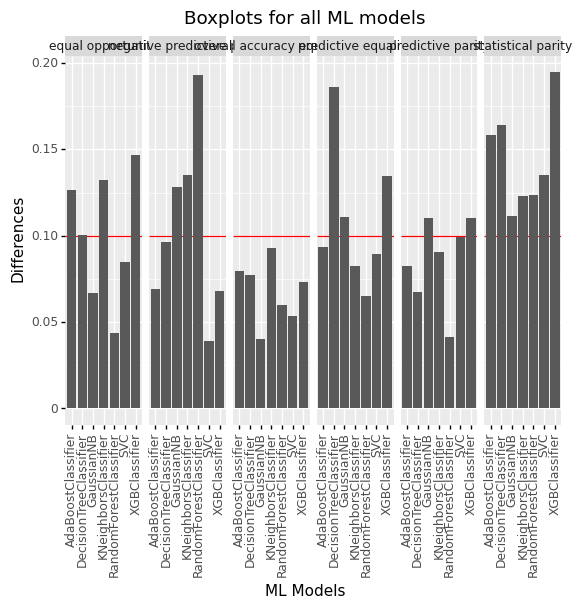

<ggplot: (8771183222781)>

In [24]:
#plot mean and range of differences -> not saved yet, WiP

plot = (p9.ggplot(data= full_differences, mapping = p9.aes(x="model", y= "difference"))
        + p9.geom_hline(yintercept = 0.1, color="red")
        + p9.stat_summary(fun_y = np.mean, fun_ymin=np.min, fun_ymax=np.max)
        + p9.facet_grid(".~definition",space="free_x", scales="fixed")
        + p9.theme(axis_text_x = p9.element_text(angle=90))
        + p9.labs(x="ML Models", y= "Differences", title=("Boxplots for all ML models"))
        )
plot